In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
NUM_CLUSTERS = 3
NUM_INPUTS = 4
MAX_ITERATIONS = 20

In [28]:
iris_input = np.genfromtxt('iris.data.txt', delimiter='\t', skip_header=1, dtype=None, usecols=(0, 1, 2, 3))
iris_output = np.genfromtxt('iris.data.txt', delimiter='\t', skip_header=1, dtype=str, usecols=(4,))
INPUT_LEN = len(iris_input)

In [29]:
bounds = np.vstack((np.max(iris_input, axis=0), 
                    np.min(iris_input, axis=0))).T
centers = tf.Variable(np.array([np.array([np.random.uniform(b[1], b[0]) for b in bounds]) for i in range(NUM_CLUSTERS)]), name='centers')
prev = tf.Variable(tf.zeros(centers.get_shape(), dtype=tf.float64), name='prev')

In [30]:
x = tf.expand_dims(iris_input, dim=0, name='x')
y = tf.expand_dims(centers, dim=1)
d = tf.sqrt(tf.reduce_sum(tf.squared_difference(x, y), 2))
cluster = tf.cast(tf.argmin(d, 0), tf.int32, name='cluster')

In [38]:
# is there any progress in training compared to previous iteration?
cont = tf.reduce_any(tf.not_equal(tf.constant(0, dtype=tf.float64), tf.squared_difference(centers, prev)), name='continue')

In [32]:
store = tf.assign(prev, centers, name='store')
update = tf.assign(centers, tf.concat(0, [tf.reduce_mean(tf.gather(iris_input, tf.reshape(tf.where(tf.equal(cluster, i)),[1,-1])), reduction_indices=[1]) for i in range(NUM_CLUSTERS)]), name='update')

In [41]:
sp, idx, count = tf.unique_with_counts(iris_output)

In [53]:
init = tf.initialize_all_variables()
with tf.Session() as session:
    summary_writer = tf.train.SummaryWriter('log', session.graph)
    session.run(init)
    while session.run(cont):
        session.run(store)
        session.run(update)

    c = session.run(centers)
    print('Cluster centers:')
    print(c)
    cl = session.run(cluster)
    print("\nIdentified data rows (cluster ids don't match):")
    print(cl)
    
    print('\nOriginal dataset:')    
    print(session.run(sp))
    print(session.run(idx))

Cluster centers:
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.006       3.428       1.462       0.246     ]]

Identified data rows (cluster ids don't match):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]

Original dataset:
[b'I_setosa' b'I_versicolor' b'I_virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


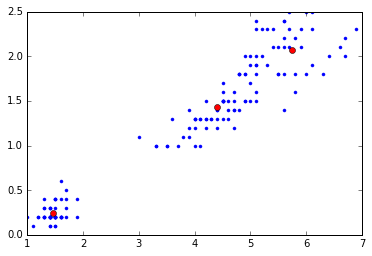

In [34]:
plt.plot(iris_input[:,2], iris_input[:,3], ".")
plt.plot(c[:,2], c[:,3], "o", color='red')